# 图像分类数据集

MNIST数据集
是图像分类中广泛使用的数据集之一，但作为基准数据集过于简单。
我们将使用类似但更复杂的Fashion-MNIST数据集

In [1]:
import sys
sys.path.append('..')

In [2]:
%matplotlib inline
import mindspore
from d2l import mindspore as d2l

d2l.use_svg_display()

下载Fashion-MNIST数据集，并解压至`../data`目录中，下载地址如下：

- http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/train-images-idx3-ubyte.gz

- http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/train-labels-idx1-ubyte.gz

- http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/t10k-images-idx3-ubyte.gz

- http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/t10k-labels-idx1-ubyte.gz

(注意下载需要科学上网, 解压需要安装gunzip)

通过框架中的内置函数将Fashion-MNIST数据集下载并读取到内存中

In [3]:
import mindspore.dataset as ds
mnist_train = ds.MnistDataset('../data', usage='train')
mnist_test = ds.MnistDataset('../data', usage='test')

mnist_train.get_dataset_size(), mnist_test.get_dataset_size()

(60000, 10000)

In [4]:
output_shapes = mnist_train.output_shapes()
output_shapes

[[28, 28, 1], []]

两个可视化数据集的函数

In [5]:
def get_fashion_mnist_labels(labels):  
    """返回Fashion-MNIST数据集的文本标签。"""
    text_labels = ['t-shirt', 'trouser', 'pullover', 'dress', 'coat',
                   'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']
    return [text_labels[int(i)] for i in labels]

def show_images(imgs, num_rows, num_cols, titles=None, scale=1.5):  
    """绘制图像列表。"""
    figsize = (num_cols * scale, num_rows * scale)
    _, axes = d2l.plt.subplots(num_rows, num_cols, figsize=figsize)
    axes = axes.flatten()
    for i, (ax, img) in enumerate(zip(axes, imgs)):
        if isinstance(img, mindspore.Tensor):
            ax.imshow(img.asnumpy())
        else:
            ax.imshow(img)
        ax.axes.get_xaxis().set_visible(False)
        ax.axes.get_yaxis().set_visible(False)
        if titles:
            ax.set_title(titles[i])
    return axes

几个样本的图像及其相应的标签

(18, 28, 28, 1) (18,)


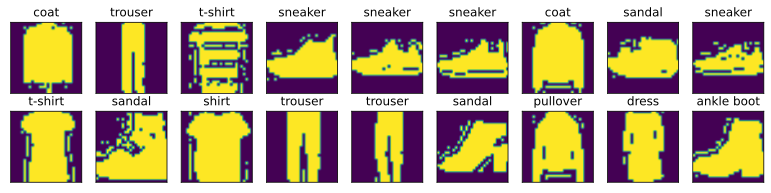

In [6]:
batch_mnist_train = mnist_train.batch(18, num_parallel_workers=4)
X, y = next(iter(batch_mnist_train.create_tuple_iterator(output_numpy=True)))
print(X.shape, y.shape)
show_images(X.reshape(18, 28, 28), 2, 9, titles=get_fashion_mnist_labels(y));

读取一小批量数据，大小为`batch_size`

In [7]:
# 由于mindspore.dataset的设计，在进行batch操作后，产生的数据处理pipeline不会再改变，所以这里不进行二次batch操作，
# 直接使用已有的dataset测试性能

timer = d2l.Timer()
for X, y in batch_mnist_train.create_tuple_iterator():
    continue
f'{timer.stop():.2f} sec'

'0.59 sec'

定义`load_data_fashion_mnist`函数

In [8]:
# 由于dataset的map需要指定column名称，需要先打印查看一下
batch_mnist_train.get_col_names()

['image', 'label']

In [9]:
import mindspore.dataset.vision.c_transforms as cv

def load_data_fashion_mnist(data_path, batch_size, resize=None, works=1):  
    """将Fashion-MNIST数据集加载到内存中。"""
    mnist_train = ds.MnistDataset(data_path, usage='train')
    mnist_test = ds.MnistDataset(data_path, usage='test')
    if resize:
        trans = [cv.Resize(resize)]
        mnist_train = mnist_train.map(trans, input_columns=["image"])
        mnist_test = mnist_test.map(trans, input_columns=["image"])
    mnist_train = mnist_train.batch(batch_size, num_parallel_workers=works)
    mnist_test = mnist_test.batch(batch_size, num_parallel_workers=works)
    return mnist_train, mnist_test

mnist_train, mnist_test = load_data_fashion_mnist('../data', 32, resize=64)
for X, y in mnist_train.create_tuple_iterator():
    print(X.shape, X.dtype, y.shape, y.dtype)
    break

(32, 64, 64, 1) UInt8 (32,) UInt32
